In [1]:
import pathlib
import pandas as pd
import numpy as np
import seaborn as sns
import plotnine
from pathlib import Path

from sklearn.preprocessing import StandardScaler
from kmodes.kprototypes import KPrototypes
from plotnine import *

In [99]:
if str(pathlib.Path().absolute()).find('content') >= 0:
    sourcepath = 'https://raw.githubusercontent.com/rjnakano/manejo-inventarios-pdg/main/Datos/Transformed'
else:
    sourcepath = '../Datos/Transformed'
print(sourcepath)    

../Datos/Transformed


In [100]:
dfTest1 = pd.read_csv('{}/dfNoDims.csv'.format(sourcepath))
dfTest1.AISLE = dfTest1.AISLE.astype(str)

In [84]:
# # Remover registros inconsistentes con las reglas de negocio
# dfTest1 = dfTest1[
#     -(((dfTest1.COSTX > 0) & (dfTest1.QTYVAR < 0)) |
#     ((dfTest1.COSTX < 0) & (dfTest1.QTYVAR > 0)))
# ]
# dfTest1 = dfTest1.reset_index(drop=True)

In [101]:
dfTest1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16244 entries, 0 to 16243
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AISLE      16244 non-null  object 
 1   IG         16244 non-null  object 
 2   HTS        16244 non-null  object 
 3   PLANNING   16244 non-null  object 
 4   ABC        16244 non-null  object 
 5   UOM        16244 non-null  object 
 6   CAT        16244 non-null  object 
 7   COSTX      16244 non-null  float64
 8   QTYVAR     16244 non-null  float64
 9   CONTRPERC  16244 non-null  float64
dtypes: float64(3), object(7)
memory usage: 1.2+ MB


In [102]:
dfTest1.tail()

,AISLE,IG,HTS,PLANNING,ABC,UOM,CAT,COSTX,QTYVAR,CONTRPERC
16239,23,IG5,HTS67,1/0,C,BX,CAT2,316.3834,1.00,0.0
16240,21,IG5,HTS67,1/0,C,BX,CAT2,626.9100,1.00,0.0
16241,22,IG5,HTS67,1/0,C,BX,CAT2,4959.6974,136.36,0.0
16242,24,IG5,HTS67,1/0,C,BX,CAT2,-1322.5860,-100.00,0.0
16243,20,IG5,HTS67,1/0,C,BX,CAT2,-255.2001,-50.00,0.0


In [103]:
dfTest1.drop('CONTRPERC', inplace=True, axis=1)

In [104]:
# Get the position of categorical columns
catColumnsPos = [dfTest1.columns.get_loc(col) for col in list(dfTest1.select_dtypes('object').columns)]
print('Categorical columns : {}'.format(list(dfTest1.select_dtypes('object').columns)))
print('Categorical columns position : {}'.format(catColumnsPos))

Categorical columns : ['AISLE', 'IG', 'HTS', 'PLANNING', 'ABC', 'UOM', 'CAT']
Categorical columns position : [0, 1, 2, 3, 4, 5, 6]


In [105]:
# Get the position of numerical columns
numColumnsPos = [dfTest1.columns.get_loc(col) for col in list(dfTest1.select_dtypes('float64').columns)]
print('Numerical columns : {}'.format(list(dfTest1.select_dtypes('float64').columns)))
print('Numerical columns position : {}'.format(numColumnsPos))

Numerical columns : ['COSTX', 'QTYVAR']
Numerical columns position : [7, 8]


In [106]:
numdf = dfTest1[list(dfTest1.select_dtypes('float64').columns)]

In [107]:
scaled_features = StandardScaler().fit_transform(numdf.values)
scaled_features_df = pd.DataFrame(scaled_features, index=numdf.index, columns=numdf.columns)
scaled_features_df

,COSTX,QTYVAR
0,-0.029671,-0.037167
1,0.092655,-0.006905
2,0.266138,0.020477
3,-0.024812,-0.044242
4,-0.077628,-0.046455
...,...,...
16239,0.098319,-0.033191
16240,0.163875,-0.033191
16241,1.078580,0.115063
16242,-0.247688,-0.143812


In [108]:
catdf = dfTest1[list(dfTest1.select_dtypes('object').columns)]

In [109]:
print("catdf",catdf.shape)
print("scaled_features_df",scaled_features_df.shape)
print(catdf.head(5))
print(scaled_features_df.head(5))
print(catdf.tail(5))
print(scaled_features_df.tail(5))
dfNoSupervisado1 = pd.concat((catdf, scaled_features_df), axis = 1)
dfNoSupervisado1

catdf (16244, 7)
scaled_features_df (16244, 2)
  AISLE    IG     HTS PLANNING ABC UOM    CAT
0    17  IG56  HTS119      1/1   B  PC  CAT17
1    17  IG56  HTS119      1/1   B  PC  CAT17
2    17  IG56  HTS119      1/1   C  PC  CAT17
3    17  IG56  HTS119      1/1   B  PC  CAT17
4    15  IG56  HTS119      1/1   C  PC  CAT17
      COSTX    QTYVAR
0 -0.029671 -0.037167
1  0.092655 -0.006905
2  0.266138  0.020477
3 -0.024812 -0.044242
4 -0.077628 -0.046455
      AISLE   IG    HTS PLANNING ABC UOM   CAT
16239    23  IG5  HTS67      1/0   C  BX  CAT2
16240    21  IG5  HTS67      1/0   C  BX  CAT2
16241    22  IG5  HTS67      1/0   C  BX  CAT2
16242    24  IG5  HTS67      1/0   C  BX  CAT2
16243    20  IG5  HTS67      1/0   C  BX  CAT2
          COSTX    QTYVAR
16239  0.098319 -0.033191
16240  0.163875 -0.033191
16241  1.078580  0.115063
16242 -0.247688 -0.143812
16243 -0.022349 -0.089049


,AISLE,IG,HTS,PLANNING,ABC,UOM,CAT,COSTX,QTYVAR
0,17,IG56,HTS119,1/1,B,PC,CAT17,-0.029671,-0.037167
1,17,IG56,HTS119,1/1,B,PC,CAT17,0.092655,-0.006905
2,17,IG56,HTS119,1/1,C,PC,CAT17,0.266138,0.020477
3,17,IG56,HTS119,1/1,B,PC,CAT17,-0.024812,-0.044242
4,15,IG56,HTS119,1/1,C,PC,CAT17,-0.077628,-0.046455
...,...,...,...,...,...,...,...,...,...
16239,23,IG5,HTS67,1/0,C,BX,CAT2,0.098319,-0.033191
16240,21,IG5,HTS67,1/0,C,BX,CAT2,0.163875,-0.033191
16241,22,IG5,HTS67,1/0,C,BX,CAT2,1.078580,0.115063
16242,24,IG5,HTS67,1/0,C,BX,CAT2,-0.247688,-0.143812


In [110]:
import numba as nb

In [111]:
from sklearn.metrics import silhouette_score
import time

dfNoSupervisado1.reset_index(drop=True)
N = dfNoSupervisado1.shape[0]

dataNum= dfNoSupervisado1.iloc[:,numColumnsPos]
dataNum=dataNum.to_numpy()
print('Datos numéricos',type(dataNum))

dataCat=dfNoSupervisado1.iloc[:,catColumnsPos]
dataCat=dataCat.to_numpy()
print('Datos categóricos',type(dataCat))

# gamma = 0.5 (constante)
catWeight=0.5

start_time = time.time()

Datos numéricos <class 'numpy.ndarray'>
Datos categóricos <class 'numpy.ndarray'>


In [112]:
@nb.njit
def dist_num_njit(data):
    scores = np.zeros((len(data),len(data)), dtype=np.float64)
    valor = nb.float64(0)

    for i in range(len(data)):
        for j in range(i+1, len(data)):
            valor = nb.float64(np.sum((data[i] - data[j]) ** 2))
            scores[i][j] = valor
    return scores

In [113]:
def dist_cat(data, catWeight):
    scores = np.zeros((len(data),len(data)), dtype=np.float64)
    for i in range(len(data)):
        for j in range(i+1, len(data)):
            scores[i][j] = np.float64(np.sum(data[i]!=data[j])*catWeight)
    return scores

In [114]:
@nb.njit
def traspose_njit (data):
    scores = data
    for i in range(len(data)):
        for j in range(1+i,len(data)):
            scores[j][i] = scores[i][j]
    return scores            

In [115]:
# Todavía no está implementado correctamente
def get_scores(data,catWeight):
    %time dist_num_np = dist_num_njit(dataNum[range(i)])
    %time dist_cat_np = dist_cat(dataCat[range(i)], catWeight)
    %time total = np.sum([dist_cat_np, dist_num_np], axis=0)
    %time total = traspose_njit(total)

In [116]:
filename='scores_backup.csv'
if not Path('{}/{}'.format(sourcepath,filename)).is_file():
    start_time = time.time()
    for i in [10, dataNum.shape[0]]:
        print('Número de filas a procesar: {}'.format(i))
        %time dist_num_np = dist_num_njit(dataNum[range(i)])
        %time dist_cat_np = dist_cat(dataCat[range(i)], catWeight)
        %time total = np.sum([dist_cat_np, dist_num_np], axis=0)
        %time total = traspose_njit(total)
        print()
    %time np.savetxt('{}/{}'.format(sourcepath,filename),total, delimiter=',')  
    print('Tiempo total = {}'.format(time.time() - start_time))
else: 
    print('El archivo {} ya existe'.format(filename))

Número de filas a procesar: 10
Wall time: 250 ms
Wall time: 997 µs
Wall time: 0 ns
Wall time: 98.7 ms

Número de filas a procesar: 16244
Wall time: 15.5 s
Wall time: 17min 57s
Wall time: 11.8 s
Wall time: 1.03 s

Wall time: 3min 52s
Tiempo total = 1338.5828411579132


In [117]:
if len(total)>0:
    scores = pd.DataFrame(total)
else: 
    %time scores = pd.read_csv('{}/{}'.format(sourcepath,filename),header=None)

In [118]:
scores.head()

,0,1,2,3,4,5,6,7,8,9,...,16234,16235,16236,16237,16238,16239,16240,16241,16242,16243
0,0.000000,0.015879,0.590826,0.000074,1.002386,6.902833,0.537322,3.448633,0.553930,1.052538,...,3.520502,3.678679,3.503599,3.523279,3.511860,3.516397,3.537476,4.751394,3.558905,3.502745
1,0.015879,0.000000,0.530846,0.015192,1.030560,6.412019,0.601336,3.890260,0.511647,1.011446,...,3.566211,3.801082,3.529990,3.501603,3.539594,3.500723,3.505763,4.486925,3.634576,3.519974
2,0.590826,0.530846,0.000000,0.588840,0.622655,6.329713,1.243998,5.065694,1.005048,1.006138,...,3.180149,3.523789,3.118231,3.023411,3.128038,3.031044,3.013338,3.669008,3.291008,3.095221
3,0.000074,0.015192,0.588840,0.000000,1.002794,6.915464,0.539015,3.463853,0.552195,1.050638,...,3.519995,3.681218,3.503232,3.521927,3.510639,3.515283,3.535725,4.742851,3.559588,3.502014
4,1.002386,1.030560,0.622655,1.002794,0.000000,7.593693,1.020928,3.784656,1.078963,1.077169,...,3.011743,3.139852,3.002132,3.040368,3.010149,3.031133,3.058500,4.362905,3.038399,3.004870


In [119]:
cost = []
silueta = []
start_time = time.time()

for k in (range(1,11)):
# try:
    kprototype = KPrototypes(n_jobs = -1, n_clusters = k, init = 'Huang', gamma = 0.5, random_state = 0)
    kprototype.fit_predict(dfNoSupervisado1, categorical = catColumnsPos)
    cost.append(kprototype.cost_)
    print('k: {}'.format(k))
    print("--- %s seconds ---" % (time.time() - start_time))
    if k != 1:
        silhouette_coeff = silhouette_score(scores, kprototype.labels_, metric='precomputed')
        silueta.append(silhouette_coeff)
        print("Coeficiente silueta --- %s seconds ---" % (time.time() - start_time))
        print(silhouette_coeff)
    # except:
    #     break

k: 1
--- 6.813639879226685 seconds ---
k: 2
--- 30.760631799697876 seconds ---
Coeficiente silueta --- 32.34104919433594 seconds ---
0.736586459830793
k: 3
--- 55.80019521713257 seconds ---
Coeficiente silueta --- 57.33009719848633 seconds ---
0.7182138218409522
k: 4
--- 78.4062979221344 seconds ---
Coeficiente silueta --- 79.88717865943909 seconds ---
0.7507712291842021
k: 5
--- 107.4079840183258 seconds ---
Coeficiente silueta --- 108.82355618476868 seconds ---
0.1390680687576104
k: 6
--- 138.33757328987122 seconds ---
Coeficiente silueta --- 139.69912266731262 seconds ---
0.16236291915758688
k: 7
--- 179.90938520431519 seconds ---
Coeficiente silueta --- 181.26535296440125 seconds ---
0.1612016834966278
k: 8
--- 212.93585443496704 seconds ---
Coeficiente silueta --- 214.2431583404541 seconds ---
0.16810389345046678
k: 9
--- 249.25574016571045 seconds ---
Coeficiente silueta --- 250.650452375412 seconds ---
0.18848050230330118
k: 10
--- 286.5875871181488 seconds ---
Coeficiente silue

In [120]:
silueta

[0.736586459830793,
 0.7182138218409522,
 0.7507712291842021,
 0.1390680687576104,
 0.16236291915758688,
 0.1612016834966278,
 0.16810389345046678,
 0.18848050230330118,
 0.16503062184410228]

In [121]:
df_cost = pd.DataFrame({'Cluster':range(1,11), 'Cost':cost})
df_silueta = pd.DataFrame({'Cluster':range(2,11), 'Coeficiente':silueta})
silueta

[0.736586459830793,
 0.7182138218409522,
 0.7507712291842021,
 0.1390680687576104,
 0.16236291915758688,
 0.1612016834966278,
 0.16810389345046678,
 0.18848050230330118,
 0.16503062184410228]

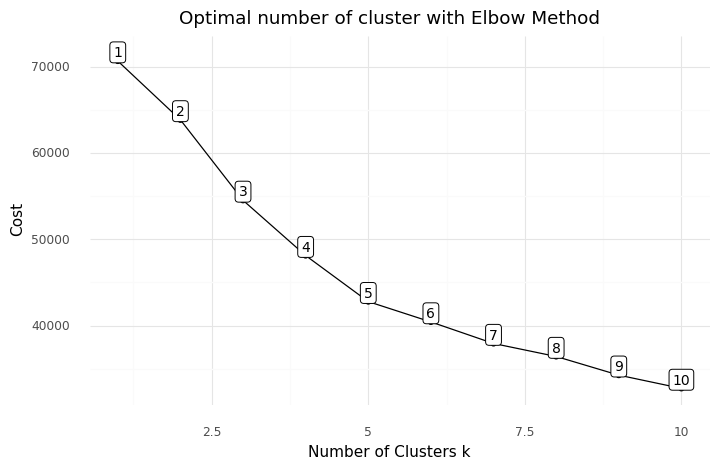

<ggplot: (115472393265)>

In [122]:
# Codo
plotnine.options.figure_size = (8, 4.8)
(
ggplot(data = df_cost)+
geom_line(aes(x = 'Cluster',
y = 'Cost'))+
geom_point(aes(x = 'Cluster',
y = 'Cost'))+
geom_label(aes(x = 'Cluster',
y = 'Cost',
label = 'Cluster'),
size = 10,
nudge_y = 1000) +
labs(title = 'Optimal number of cluster with Elbow Method')+
xlab('Number of Clusters k')+
ylab('Cost')+
theme_minimal()
)

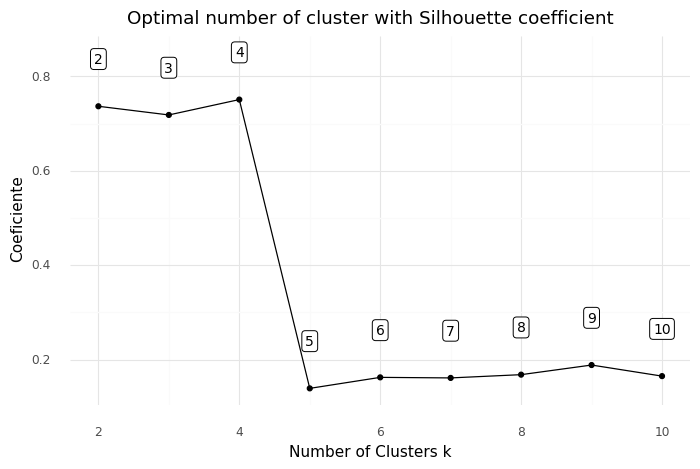

<ggplot: (115472537591)>

In [123]:
# Coeficiente silueta
plotnine.options.figure_size = (8, 4.8)
(
ggplot(data = df_silueta)+
geom_line(aes(x = 'Cluster',
y = 'Coeficiente'))+
geom_point(aes(x = 'Cluster',
y = 'Coeficiente'))+
geom_label(aes(x = 'Cluster',
y = 'Coeficiente',
label = 'Cluster'),
size = 10,
nudge_y = 0.1) +
labs(title = 'Optimal number of cluster with Silhouette coefficient')+
xlab('Number of Clusters k')+
ylab('Coeficiente')+
theme_minimal()
)

In [75]:
dfTest2 = dfTest1# Get the position of categorical columns
dfTest2.head()

,AISLE,IG,HTS,PLANNING,ABC,UOM,CAT,COSTX,QTYVAR
0,17,IG56,HTS119,1/1,B,PC,CAT17,-289.8802,-2.63
1,17,IG56,HTS119,1/1,B,PC,CAT17,289.5527,25.00
2,17,IG56,HTS119,1/1,C,PC,CAT17,1111.3121,50.00
3,17,IG56,HTS119,1/1,B,PC,CAT17,-266.8633,-9.09
4,15,IG56,HTS119,1/1,C,PC,CAT17,-517.0436,-11.11


In [76]:
catColumnsPos = [dfTest2.columns.get_loc(col) for col in list(dfTest2.select_dtypes('object').columns)]
print('Categorical columns : {}'.format(list(dfTest2.select_dtypes('object').columns)))
print('Categorical columns position : {}'.format(catColumnsPos))

Categorical columns : ['AISLE', 'IG', 'HTS', 'PLANNING', 'ABC', 'UOM', 'CAT']
Categorical columns position : [0, 1, 2, 3, 4, 5, 6]


,AISLE,IG,HTS,PLANNING,ABC,UOM,CAT,COSTX,QTYVAR
0,17,IG56,HTS119,1/1,B,PC,CAT17,-289.8802,-2.63
1,17,IG56,HTS119,1/1,B,PC,CAT17,289.5527,25.00
2,17,IG56,HTS119,1/1,C,PC,CAT17,1111.3121,50.00
3,17,IG56,HTS119,1/1,B,PC,CAT17,-266.8633,-9.09
4,15,IG56,HTS119,1/1,C,PC,CAT17,-517.0436,-11.11


In [77]:
# Get the position of numerical columns
numColumnsPos = [dfTest2.columns.get_loc(col) for col in list(dfTest2.select_dtypes('float64').columns)]
print('Numerical columns : {}'.format(list(dfTest2.select_dtypes('float64').columns)))
print('Numerical columns position : {}'.format(numColumnsPos))

Numerical columns : ['COSTX', 'QTYVAR']
Numerical columns position : [7, 8]


In [78]:
numdf = dfTest2[list(dfTest2.select_dtypes('float64').columns)]

In [79]:
scaled_features = StandardScaler().fit_transform(numdf.values)
scaled_features_df = pd.DataFrame(scaled_features, index=numdf.index, columns=numdf.columns)
scaled_features_df

,COSTX,QTYVAR
0,-0.029976,-0.037185
1,0.092472,-0.006928
2,0.266130,0.020450
3,-0.025112,-0.044259
4,-0.077982,-0.046471
...,...,...
16239,0.098142,-0.033210
16240,0.163764,-0.033210
16241,1.079388,0.115021
16242,-0.248212,-0.143814


In [81]:
dfTest1

,AISLE,IG,HTS,PLANNING,ABC,UOM,CAT,COSTX,QTYVAR
0,17,IG56,HTS119,1/1,B,PC,CAT17,-289.8802,-2.63
1,17,IG56,HTS119,1/1,B,PC,CAT17,289.5527,25.00
2,17,IG56,HTS119,1/1,C,PC,CAT17,1111.3121,50.00
3,17,IG56,HTS119,1/1,B,PC,CAT17,-266.8633,-9.09
4,15,IG56,HTS119,1/1,C,PC,CAT17,-517.0436,-11.11
...,...,...,...,...,...,...,...,...,...
16239,23,IG5,HTS67,1/0,C,BX,CAT2,316.3834,1.00
16240,21,IG5,HTS67,1/0,C,BX,CAT2,626.9100,1.00
16241,22,IG5,HTS67,1/0,C,BX,CAT2,4959.6974,136.36
16242,24,IG5,HTS67,1/0,C,BX,CAT2,-1322.5860,-100.00


In [26]:
# Fit the cluster 
# k = 2
import time
start_time = time.time()
kprototype = KPrototypes(n_jobs = -1, n_clusters = 4, init = 'Huang', gamma = 0.5, random_state = 0)
kprototype.fit_predict(dfNoSupervisado1, categorical = catColumnsPos)
print("--- %s seconds ---" % (time.time() - start_time))

--- 32.31405973434448 seconds ---


In [27]:
# Cluster centroids
print(kprototype.cluster_centroids_)
# Check the iteration of the clusters created
print(kprototype.n_iter_)
# Check the cost of the clusters created
kprototype.cost_

[['0.002726388751717142' '-0.03595785577407407' '2' 'IG45' 'HTS119' '1/1'
  'A' 'BX' 'CAT17']
 ['-3.6487292748298596' '-0.11901373330295542' '37' 'IG64' 'HTS15' '1/1'
  'A' 'BX' 'CAT14']
 ['1.784357513065899' '36.717082988705094' '2' 'IG38' 'HTS61' '1/1' 'A'
  'SQFT' 'CAT8']
 ['2.79799290946075' '0.50533898239745' '37' 'IG64' 'HTS15' '1/1' 'A'
  'BX' 'CAT14']]
10


48126.233539401066

In [28]:
# Add the cluster to the dataframe
dfNoSupervisado1['Cluster Labels'] = kprototype.labels_
dfNoSupervisado1.to_csv("{}/k4NoDimsNoCON.csv".format(sourcepath), index = False)
dfNoSupervisado1['Cluster Labels'].unique()

array([0, 3, 1, 2], dtype=uint16)

In [29]:
pd.set_option('display.max_columns', None)

In [30]:
for col in list(dfTest1.select_dtypes('object').columns):
    contingency = pd.crosstab(dfNoSupervisado1['Cluster Labels'], dfNoSupervisado1[col]) 
    print('------------- Columna: {} -------------'.format(col))
    print(contingency)
    print()

------------- Columna: AISLE -------------
AISLE            0    1   10   11    12   13   14   15   16   17   18   19  \
Cluster Labels                                                               
0               63  208  607  698  1042  808  769  835  532  568  330  326   
1                3    8   12   35     3    5    5    8    7    8    2    3   
2                0    0    0    0     0    0    0    0    1    0    0    0   
3                4    6   17   53    11   13   11    8   14   10    8   10   

AISLE              2   20   21   22  23  24   25  26  27   28   29    3   30  \
Cluster Labels                                                                 
0               1072  239  235  208  81  72  110  61  82  147  124  756  138   
1                 21    2    8   11   4   9   12   8   9    9    8   14    7   
2                  4    0    0    0   1   0    0   0   0    0    0    0    0   
3                 20    6    7    7   4   6   12  13   7   13   15   35   11   

AISLE  

In [36]:
dfNoSupervisado1[dfNoSupervisado1['Cluster Labels']==0].describe()

,COSTX,QTYVAR,CONTRPERC,Cluster Labels
count,16101.000000,16101.000000,16101.000000,16101.0
mean,0.002368,-0.000253,-0.083102,0.0
std,0.947685,1.004003,0.416489,0.0
min,-8.308003,-0.143812,-0.210139,0.0
25%,-0.120570,-0.089049,-0.210139,0.0
50%,0.024549,-0.035579,-0.185651,0.0
75%,0.157853,-0.029303,-0.161163,0.0
max,8.307268,80.959836,4.246670,0.0


In [37]:
dfNoSupervisado1[dfNoSupervisado1['Cluster Labels']==1].describe()

,COSTX,QTYVAR,CONTRPERC,Cluster Labels
count,143.000000,143.000000,143.000000,143.0
mean,-0.266662,0.028499,9.356777,1.0
std,3.534762,0.322169,2.403798,0.0
min,-8.415911,-0.143812,5.495556,1.0
25%,-2.701571,-0.090424,7.650497,1.0
50%,-0.130681,-0.037725,11.127787,1.0
75%,2.143386,0.007443,11.127787,1.0
max,8.414728,3.032428,11.127787,1.0


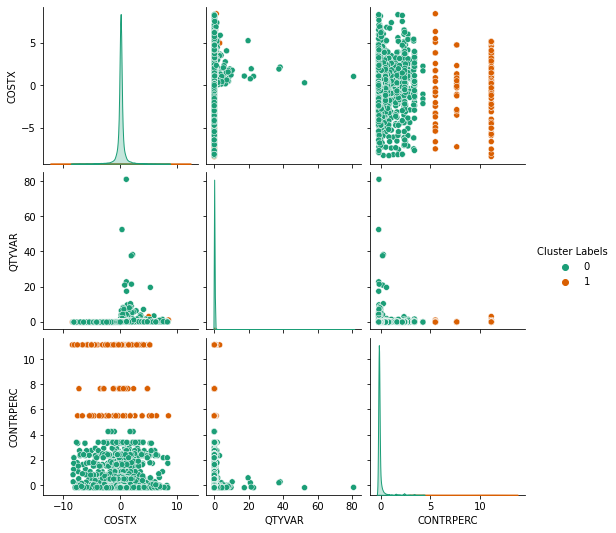

In [38]:
sns.pairplot(dfNoSupervisado1,hue='Cluster Labels',palette='Dark2',diag_kind='kde')

Cluster 0: ajustes de todo rango (costo) + variación principalmente baja y contribución media baja

Cluster 1: ajustes de todo rango (costo) + variación  baja y contribución media alta

### **Priorizar cluster 1?**

In [39]:
# Fit the cluster
# k = 3
import time
start_time = time.time()
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3, init = 'Huang', gamma = 0.5, random_state = 0)
kprototype.fit_predict(dfNoSupervisado1, categorical = catColumnsPos)
print("--- %s seconds ---" % (time.time() - start_time))

--- 24.806804895401 seconds ---


In [40]:
# Cluster centroids
print(kprototype.cluster_centroids_)
# Check the iteration of the clusters created
print(kprototype.n_iter_)
# Check the cost of the clusters created
kprototype.cost_

[['-0.26666198057235585' '0.02849878766195622' '9.356776667957435' '1.0'
  '32' 'IG61' 'HTS6' '1/1' 'A' 'BX' 'CAT14']
 ['1.7048385391605871' '34.568548384858516' '0.02385698576148208' '0.0'
  '2' 'IG38' 'HTS61' '1/1' 'A' 'SQFT' 'CAT8']
 ['0.0014161767567346258' '-0.019586891753627562' '-0.08316143278583893'
  '0.0' '2' 'IG45' 'HTS119' '1/1' 'A' 'BX' 'CAT17']]
10


63276.65019411367

In [41]:
# Add the cluster to the dataframe
dfNoSupervisado1['Cluster Labels'] = kprototype.labels_
dfNoSupervisado1.to_csv("{}/k3NoDims.csv".format(sourcepath), index = False)
dfNoSupervisado1['Cluster Labels'].unique()
np.unique(kprototype.labels_)

array([0, 1, 2], dtype=uint16)

In [42]:
pd.set_option('display.max_columns', None)

In [43]:
for col in list(dfTest1.select_dtypes('object').columns):
    contingency = pd.crosstab(dfNoSupervisado1['Cluster Labels'], dfNoSupervisado1[col]) 
    print('------------- Columna: {} -------------'.format(col))
    print(contingency)
    print()

------------- Columna: AISLE -------------
AISLE            0    1   10   11    12   13   14   15   16   17   18   19  \
Cluster Labels                                                               
0                0    0    3   10     0    0    0    0    0    0    0    0   
1                0    0    0    0     0    0    1    0    1    0    0    0   
2               70  222  633  776  1056  826  784  851  553  586  340  339   

AISLE              2   20   21   22  23  24   25  26  27   28   29    3   30  \
Cluster Labels                                                                 
0                  0    0    0    0   0   0    0   0   0    3    4    0    3   
1                  4    0    0    0   1   0    0   0   0    0    0    0    0   
2               1113  247  250  226  89  87  134  82  98  166  143  805  153   

AISLE            31   32   33   34  35   37   38   39    4   40   41    5  \
Cluster Labels                                                              
0          

In [44]:
dfNoSupervisado1[dfNoSupervisado1['Cluster Labels']==0].describe()

,COSTX,QTYVAR,CONTRPERC,Cluster Labels
count,143.000000,143.000000,143.000000,143.0
mean,-0.266662,0.028499,9.356777,0.0
std,3.534762,0.322169,2.403798,0.0
min,-8.415911,-0.143812,5.495556,0.0
25%,-2.701571,-0.090424,7.650497,0.0
50%,-0.130681,-0.037725,11.127787,0.0
75%,2.143386,0.007443,11.127787,0.0
max,8.414728,3.032428,11.127787,0.0


In [45]:
dfNoSupervisado1[dfNoSupervisado1['Cluster Labels']==1].describe()

,COSTX,QTYVAR,CONTRPERC,Cluster Labels
count,9.000000,9.000000,9.000000,9.0
mean,1.704839,34.568548,0.023857,1.0
std,1.460157,20.958121,0.284554,0.0
min,0.274541,17.380272,-0.210139,1.0
25%,1.024759,20.885088,-0.210139,1.0
50%,1.068687,22.747022,-0.161163,1.0
75%,1.926229,38.212026,0.181668,1.0
max,5.242270,80.959836,0.573476,1.0


In [46]:
dfNoSupervisado1[dfNoSupervisado1['Cluster Labels']==2].describe()

,COSTX,QTYVAR,CONTRPERC,Cluster Labels
count,16092.000000,16092.000000,16092.000000,16092.0
mean,0.001416,-0.019587,-0.083161,2.0
std,0.946534,0.348489,0.416549,0.0
min,-8.308003,-0.143812,-0.210139,2.0
25%,-0.120660,-0.089049,-0.210139,2.0
50%,0.024429,-0.035590,-0.185651,2.0
75%,0.156967,-0.029303,-0.161163,2.0
max,8.307268,10.315875,4.246670,2.0


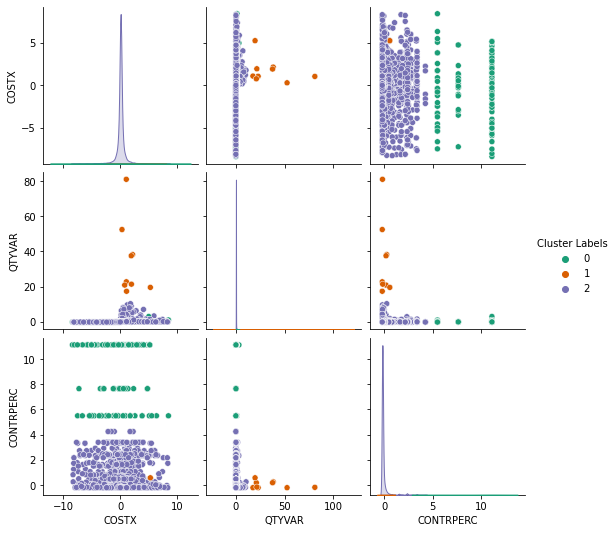

In [47]:
sns.pairplot(dfNoSupervisado1,hue='Cluster Labels',palette='Dark2',diag_kind='kde')

Cluster 0: ajustes positivos (costo) + baja variación y contribución media baja

Cluster 1: ajustes negativos (costo) + variación todo rango pero principalmente baja y contribución media baja

Cluster 2: ajustes de todo rango (costo) + baja variación y alta contribución

### Priorizar clusters 1 y 2?

In [48]:
dfTest2 = pd.read_csv('{}/dataframe_imputado_test2.csv'.format(sourcepath))
dfTest2['AISLE'] = dfTest2['AISLE'].astype(str)
dfTest2['PLANNING'] =dfTest2['CLASS'].astype(str) + "/" + dfTest2['PLANNING'].astype(str)
# Borramos las columnas que no serán utilizados en este segundo intento
dfTest2 = dfTest2.drop(['TDATE','SKU','LOC','COLUMN','SHELF','TYPE','CLASS','QTYBEFORE','Zqty','ZqtyVar','ZcostX','QTY'], axis=1)
dfTest2.dtypes

AISLE         object
IG            object
HTS           object
PLANNING      object
ABC           object
UOM           object
CAT           object
COSTX        float64
QTYVAR       float64
PESO         float64
LARGO        float64
ALTO         float64
ANCHO        float64
CONTRPERC    float64
dtype: object

In [49]:
# Get the position of categorical columns
catColumnsPos = [dfTest2.columns.get_loc(col) for col in list(dfTest2.select_dtypes('object').columns)]
print('Categorical columns : {}'.format(list(dfTest2.select_dtypes('object').columns)))
print('Categorical columns position : {}'.format(catColumnsPos))

Categorical columns : ['AISLE', 'IG', 'HTS', 'PLANNING', 'ABC', 'UOM', 'CAT']
Categorical columns position : [0, 1, 2, 3, 4, 5, 6]


In [50]:
# Get the position of numerical columns
numColumnsPos = [dfTest2.columns.get_loc(col) for col in list(dfTest2.select_dtypes('float64').columns)]
print('Numerical columns : {}'.format(list(dfTest2.select_dtypes('float64').columns)))
print('Numerical columns position : {}'.format(numColumnsPos))

Numerical columns : ['COSTX', 'QTYVAR', 'PESO', 'LARGO', 'ALTO', 'ANCHO', 'CONTRPERC']
Numerical columns position : [7, 8, 9, 10, 11, 12, 13]


In [51]:
#dfTest2=dfTest2.iloc[:,(dfTest2['PESO']!=0 & dfTest2['LARGO']!=0 & dfTest2['ANCHO']!=0 & dfTest2['ALTO']!=0)]
dfTest2=dfTest2[(dfTest2['PESO']!=0) & (dfTest2['LARGO']!=0) & (dfTest2['ANCHO']!=0) & (dfTest2['ALTO']!=0)]

In [52]:
print(dfTest2.shape);
dfTest2.describe()

(14962, 14)


,COSTX,QTYVAR,PESO,LARGO,ALTO,ANCHO,CONTRPERC
count,14962.000000,14962.000000,14962.000000,14962.000000,14962.000000,14962.000000,14962.000000
mean,-139.936771,33.635761,14.657292,58.541739,5.233290,6.187632,0.091653
std,4815.705231,948.320559,44.564134,65.580532,4.580995,4.157028,0.424152
min,-40013.935000,-100.000000,0.001000,0.001000,0.020000,0.060000,0.000000
25%,-737.577900,-50.000000,0.717000,7.000000,2.000000,3.070000,0.000000
50%,-22.663800,-0.760000,2.370000,15.000000,4.000000,6.000000,0.010000
75%,646.305800,4.307500,14.000000,109.500000,7.500000,8.000000,0.030000
max,39709.661400,73950.000000,3250.000000,241.000000,50.500000,48.000000,4.630000


In [53]:
numdf = dfTest2[list(dfTest2.select_dtypes('float64').columns)]

In [54]:
scaled_features = StandardScaler().fit_transform(numdf.values)
scaled_features_df = pd.DataFrame(scaled_features, index=numdf.index, columns=numdf.columns)
scaled_features_df

,COSTX,QTYVAR,PESO,LARGO,ALTO,ANCHO,CONTRPERC
28,-1.668992,-0.140923,-0.290766,-0.336113,-0.432953,-0.766831,-0.192515
29,-0.018109,-0.039604,-0.290766,-0.336113,-0.432953,-0.766831,-0.192515
30,0.064435,-0.033466,-0.290766,-0.336113,-0.432953,-0.766831,-0.192515
31,-0.041693,-0.041997,-0.290766,-0.336113,-0.432953,-0.766831,-0.121783
32,-0.584126,-0.138930,-0.290766,-0.336113,-0.432953,-0.766831,-0.121783
...,...,...,...,...,...,...,...
16239,0.094760,-0.034415,0.680900,1.577629,-0.623966,-0.045138,-0.216092
16240,0.159244,-0.034415,0.680900,1.577629,-0.623966,-0.045138,-0.216092
16241,1.058994,0.108326,0.680900,1.577629,-0.623966,-0.045138,-0.216092
16242,-0.245590,-0.140923,0.680900,1.577629,-0.623966,-0.045138,-0.216092


In [55]:
catdf = dfTest2[list(dfTest1.select_dtypes('object').columns)]

In [56]:
print("catdf",catdf.shape)
print("scaled_features_df",scaled_features_df.shape)
print(catdf.head(5))
print(scaled_features_df.head(5))
print(catdf.tail(5))
print(scaled_features_df.tail(5))
dfNoSupervisado2 = pd.concat((catdf, scaled_features_df), axis = 1)
dfNoSupervisado2

catdf (14962, 7)
scaled_features_df (14962, 7)
   AISLE    IG     HTS PLANNING ABC UOM    CAT
28    12  IG46  HTS119      1/1   B  PC  CAT17
29    17  IG46  HTS119      1/1   B  PC  CAT17
30    17  IG46  HTS119      1/1   B  PC  CAT17
31    13  IG46  HTS119      1/1   A  PC  CAT17
32    13  IG46  HTS119      1/1   A  PC  CAT17
       COSTX    QTYVAR      PESO     LARGO      ALTO     ANCHO  CONTRPERC
28 -1.668992 -0.140923 -0.290766 -0.336113 -0.432953 -0.766831  -0.192515
29 -0.018109 -0.039604 -0.290766 -0.336113 -0.432953 -0.766831  -0.192515
30  0.064435 -0.033466 -0.290766 -0.336113 -0.432953 -0.766831  -0.192515
31 -0.041693 -0.041997 -0.290766 -0.336113 -0.432953 -0.766831  -0.121783
32 -0.584126 -0.138930 -0.290766 -0.336113 -0.432953 -0.766831  -0.121783
      AISLE   IG    HTS PLANNING ABC UOM   CAT
16239    23  IG5  HTS67      1/0   C  BX  CAT2
16240    21  IG5  HTS67      1/0   C  BX  CAT2
16241    22  IG5  HTS67      1/0   C  BX  CAT2
16242    24  IG5  HTS67      1/0   C  B

,AISLE,IG,HTS,PLANNING,ABC,UOM,CAT,COSTX,QTYVAR,PESO,LARGO,ALTO,ANCHO,CONTRPERC
28,12,IG46,HTS119,1/1,B,PC,CAT17,-1.668992,-0.140923,-0.290766,-0.336113,-0.432953,-0.766831,-0.192515
29,17,IG46,HTS119,1/1,B,PC,CAT17,-0.018109,-0.039604,-0.290766,-0.336113,-0.432953,-0.766831,-0.192515
30,17,IG46,HTS119,1/1,B,PC,CAT17,0.064435,-0.033466,-0.290766,-0.336113,-0.432953,-0.766831,-0.192515
31,13,IG46,HTS119,1/1,A,PC,CAT17,-0.041693,-0.041997,-0.290766,-0.336113,-0.432953,-0.766831,-0.121783
32,13,IG46,HTS119,1/1,A,PC,CAT17,-0.584126,-0.138930,-0.290766,-0.336113,-0.432953,-0.766831,-0.121783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16239,23,IG5,HTS67,1/0,C,BX,CAT2,0.094760,-0.034415,0.680900,1.577629,-0.623966,-0.045138,-0.216092
16240,21,IG5,HTS67,1/0,C,BX,CAT2,0.159244,-0.034415,0.680900,1.577629,-0.623966,-0.045138,-0.216092
16241,22,IG5,HTS67,1/0,C,BX,CAT2,1.058994,0.108326,0.680900,1.577629,-0.623966,-0.045138,-0.216092
16242,24,IG5,HTS67,1/0,C,BX,CAT2,-0.245590,-0.140923,0.680900,1.577629,-0.623966,-0.045138,-0.216092


In [57]:
dfTest2.shape

(14962, 14)

In [58]:
dfNoSupervisado2.reset_index(drop=True)
N = dfNoSupervisado2.shape[0]

dataNum=dfNoSupervisado2.iloc[:,numColumnsPos]
dataNum=dataNum.to_numpy()
print('Datos numéricos',type(dataNum))

dataCat=dfNoSupervisado2.iloc[:,catColumnsPos]
dataCat=dataCat.to_numpy()
print('Datos categóricos',type(dataCat))

# gamma = 0.5 (constante)
catWeight=0.5

Datos numéricos <class 'numpy.ndarray'>
Datos categóricos <class 'numpy.ndarray'>


In [59]:
filename='scores2.csv'
if not Path('{}/{}'.format(sourcepath,filename)).is_file():
    start_time = time.time()
    for i in [10, dataNum.shape[0]]:
        print('Número de filas a procesar: {}'.format(i))
        %time dist_num_np = dist_num_njit(dataNum[range(i)])
        %time dist_cat_np = dist_cat(dataCat[range(i)], catWeight)
        %time total = np.sum([dist_cat_np, dist_num_np], axis=0)
        %time total = traspose_njit(total)
        print()
    %time np.savetxt('{}/{}'.format(sourcepath,filename),total, delimiter=',')  
    print('Tiempo total = {}'.format(time.time() - start_time))
else: 
    print('El archivo {} ya existe'.format(filename))

Número de filas a procesar: 10
CPU times: user 180 µs, sys: 27.6 ms, total: 27.7 ms
Wall time: 28.7 ms
CPU times: user 855 µs, sys: 29 ms, total: 29.8 ms
Wall time: 29.6 ms
CPU times: user 289 µs, sys: 51.9 ms, total: 52.2 ms
Wall time: 52.2 ms
CPU times: user 11 µs, sys: 17 µs, total: 28 µs
Wall time: 31 µs

Número de filas a procesar: 14962
CPU times: user 12.4 s, sys: 676 ms, total: 13 s
Wall time: 13.4 s
CPU times: user 19min 11s, sys: 9.69 s, total: 19min 21s
Wall time: 19min 25s
CPU times: user 3.19 s, sys: 6.42 s, total: 9.61 s
Wall time: 10.7 s
CPU times: user 911 ms, sys: 4.7 ms, total: 916 ms
Wall time: 917 ms

CPU times: user 2min 18s, sys: 4.46 s, total: 2min 23s
Wall time: 2min 24s
Tiempo total = 1335.685646057129


In [60]:
total = None
%time scores2 = pd.read_csv('{}/{}'.format(sourcepath,filename),header=None)

CPU times: user 1min 32s, sys: 5.42 s, total: 1min 38s
Wall time: 1min 38s


In [61]:
# gamma = 0.5 (constante)

cost = []
silueta = []
start_time = time.time()

for k in (list(range(1,6)) + [10]):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = k, init = 'Huang', gamma = 0.5, random_state = 0)
        kprototype.fit_predict(dfNoSupervisado2, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('k: {}'.format(k))
        print("--- %s seconds ---" % (time.time() - start_time))
        if k != 1:
            silhouette_coeff = silhouette_score(scores2, kprototype.labels_, metric='precomputed')
            silueta.append(silhouette_coeff)
            print("Coeficiente silueta --- %s seconds ---" % (time.time() - start_time))
            print(silhouette_coeff)

    except:
        break

k: 1
--- 5.718609809875488 seconds ---
k: 2
--- 21.490855932235718 seconds ---
Coeficiente silueta --- 25.805723905563354 seconds ---
0.22335676178658084
k: 3
--- 53.19337606430054 seconds ---
Coeficiente silueta --- 57.321144819259644 seconds ---
0.26538592744427836
k: 4
--- 87.5553228855133 seconds ---
Coeficiente silueta --- 91.6487717628479 seconds ---
0.3335240243307776
k: 5
--- 124.26177883148193 seconds ---
Coeficiente silueta --- 128.33748292922974 seconds ---
0.3742311957144819
k: 10
--- 175.79560780525208 seconds ---
Coeficiente silueta --- 179.8331217765808 seconds ---
0.33386946089874636


In [62]:
cost = pd.DataFrame({'Cluster':list(range(1,6)) + [10], 'Cost':cost})
df_silueta = pd.DataFrame({'Cluster':list(range(2,6)) + [10], 'Coeficiente':silueta})